In [144]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 9
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

## Exercice 1: Price time series

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.347170  24.817055  23.906234  24.805920  212818400
2015-01-05  23.661268  24.195735  23.474206  24.115565  257142000
2015-01-06  23.663500  23.924052  23.300507  23.725854  263188400
2015-01-07  23.995314  24.095525  23.761484  23.872831  160423600
2015-01-08  24.917263  24.975164  24.206868  24.324897  237458000


<Axes: title={'center': 'AAPL daily closing price'}, xlabel='Date'>

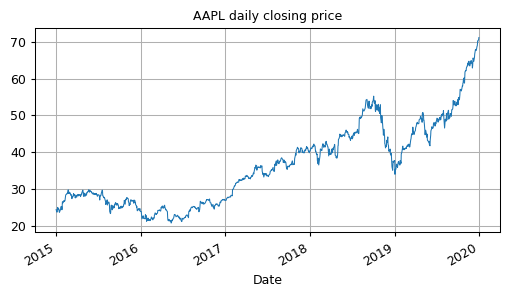

In [3]:
tickers = ["AAPL"]
start_date = "2015-01-01"
end_date = "2020-01-01"
stock_data = yf.download(tickers, start=start_date, end=end_date)

# Show the first few rows of the stock data
print(stock_data.head())
stock_data['Close'].plot(figsize=(6, 3), title=f'{tickers[0]} daily closing price', grid=True, legend=False)

## Exercice 2: Return time series

In [4]:
stock_data['Linear_Return'] = stock_data['Close'].pct_change()
stock_data['Log_Return'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))

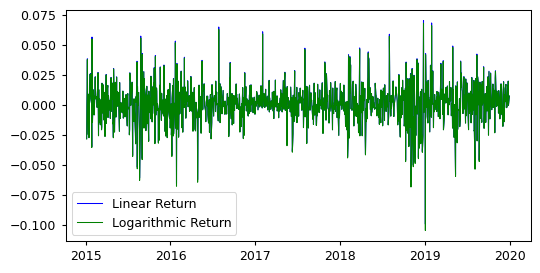

In [5]:
plt.figure(figsize=(6, 3))
plt.plot(stock_data['Linear_Return'], label="Linear Return", color='blue')
plt.plot(stock_data['Log_Return'], label="Logarithmic Return", color='green')
plt.legend()

## Exercice 3: Volatility envelope

In [98]:
tickers = ["AAPL"]
start_date = "2015-01-01"
end_date = "2020-01-01"
stock_data = yf.download(tickers, start=start_date, end=end_date)
stock_data['returns'] = stock_data['Close'].pct_change() #linear returns


window_size = 30
stock_data['Left_Rolling_Volatility'] = stock_data['returns'].rolling(window=window_size, center=False).std()
stock_data['Centered_Rolling_Volatility'] = stock_data['returns'].rolling(window=window_size, center=True).std()

stock_data = stock_data[window_size:]

[*********************100%***********************]  1 of 1 completed


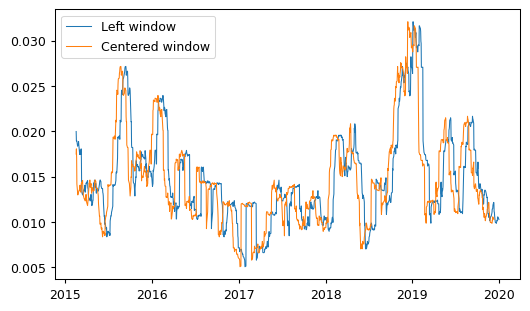

In [100]:
plt.figure(figsize=(6, 3.5))
plt.plot(stock_data['Left_Rolling_Volatility'], label='Left window')
plt.plot(stock_data['Centered_Rolling_Volatility'], label='Centered window')
plt.legend()

## Exercice 4: Return distribution

In [103]:
tickers = ["AAPL"]
start_date = "2015-01-01"
end_date = "2020-01-01"
stock_data = yf.download(tickers, start=start_date, end=end_date)
stock_data['returns'] = np.log(stock_data['Close']/stock_data['Close'].shift(1)) #linear returns

[*********************100%***********************]  1 of 1 completed


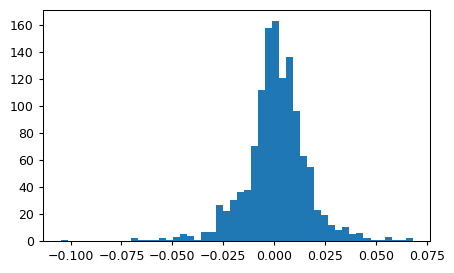

In [111]:
plt.hist(stock_data['returns'], bins=50)
plt.show()

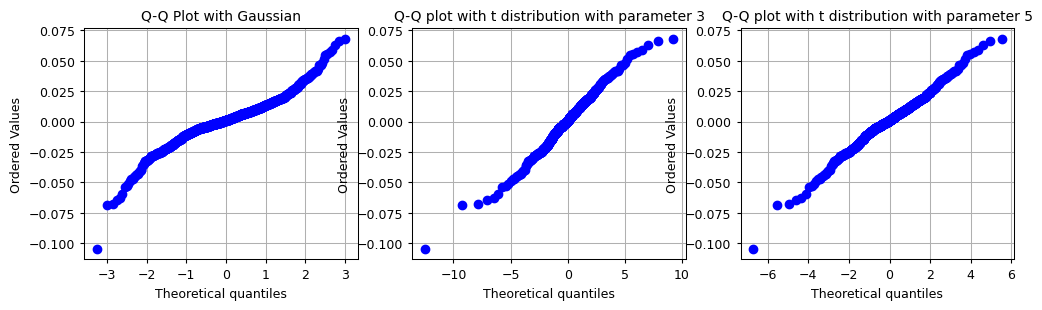

In [142]:
ig, axes = plt.subplots(1, 3, figsize=(12, 3))  # 1 row, 3 columns

stats.probplot(stock_data['returns'], dist="norm", plot=axes[0])
axes[0].set_title(f'Q-Q Plot with Gaussian', fontsize=10)
axes[0].grid(True)

stats.probplot(stock_data['returns'], dist="t", sparams=(3,), plot=axes[1])
axes[1].set_title(f'Q-Q plot with t distribution with parameter 3', fontsize=10)
axes[1].grid(True)

stats.probplot(stock_data['returns'], dist="t", sparams=(5,), plot=axes[2])  # t-distribution with df=3
axes[2].set_title(f'Q-Q plot with t distribution with parameter 5', fontsize=10)
axes[2].grid(True)

## Exercice 5: Return autocorrelation

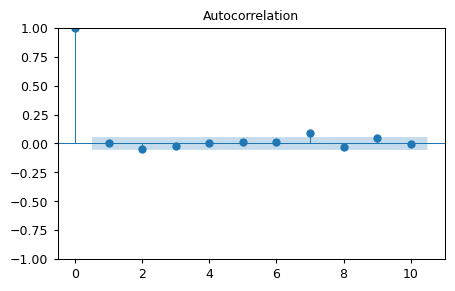

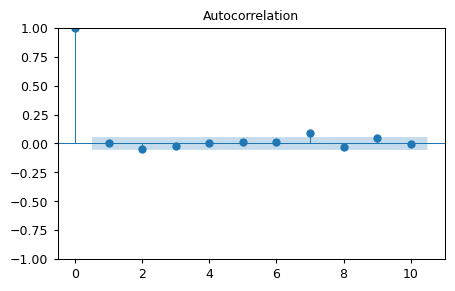

In [159]:
plot_acf(stock_data['returns'][1:], lags=10, alpha=0.05)

In [160]:
stock_data['Linear_Return'] = stock_data['Close'].pct_change()
stock_data['Squared_Return'] = stock_data['Linear_Return']**2

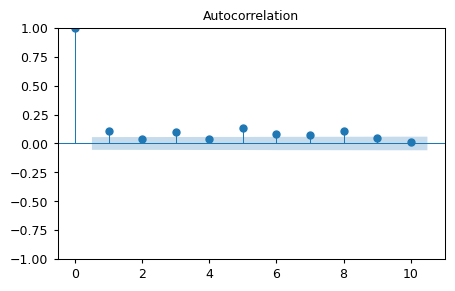

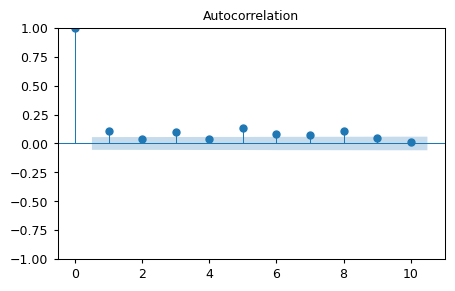

In [165]:
plot_acf(stock_data['Squared_Return'][1:], lags=10, alpha=0.05)

Squared returns give us an idea of the variance of returns, as variance is the average of squared deviations from the mean. Autocorrelation of squared returns show the phenomenon of volatility clustering.